In [1]:
import os
import sys 
import warnings

import plots_rank_models
import plots_calibration_gof
import plots_it_performance
import plots_param_uncertainty
import plots_supplementary_info

warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

## Notebook description

This ipython notebook executes scripts in this repository to repeat analysis and recreate all figures in:

Bassiouni M. and G. Vico (2021). Parsimony versus predictive and functional performance of three stomatal optimization principles in a big-leaf framework, *New Phytologist*. https://doi.org/10.1111/nph.17392.


The following scripts manage data (get_metadata_sites.py, get_data_sites.py), calibrate models (fit_gs_params.py), and generate results (process_fit_gs_results.py) represented in this notebook.

The FLUXNET2015 data products used in this study are available at http://fluxnet.fluxdata.org/data/fluxnet2015-dataset/.



**Summary**

- Stomatal optimization models can improve estimates of water and carbon fluxes with relatively low complexity, yet there is no consensus on which formulations are most appropriate for ecosystem‐scale applications. We implemented three existing analytical equations for stomatal conductance, based on different water penalty functions, in a big‐leaf comparison framework, and determined which optimization principles were most consistent with flux tower observations from different biomes.

- We used information theory to dissect controls of soil water supply and atmospheric demand on evapotranspiration in wet to dry conditions and to quantify missing or inadequate information in model variants. We ranked stomatal optimization principles based on parameter uncertainty, parsimony, predictive accuracy, and functional accuracy of the interactions between soil moisture, vapor pressure deficit, and evapotranspiration.

- Performance was high for all model variants. Water penalty functions with explicit representation of plant hydraulics did not substantially improve predictive or functional accuracy of ecosystem‐scale evapotranspiration estimates and parameterizations were more uncertain, despite having physiological underpinnings at the plant level.

- Stomatal optimization based on water use efficiency thus provided more information about ecosystem‐scale evapotranspiration compared to those based on xylem vulnerability and proved more useful in improving ecosystem‐scale models with less complexity.



Performance Scores
	WUE	CM	SOX
(a)	0.54 	0.38 	0.58 
(b)	0.65 	0.35 	0.50 
(c)	0.63 	0.47 	0.40 
(d)	0.73 	0.62 	0.15 
(e)	0.79 	0.68 	0.03 


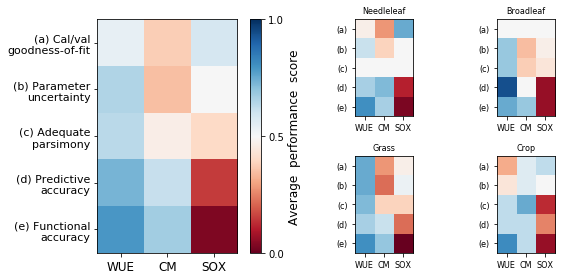

In [3]:
plots_rank_models.fig_3M('2_fig')

**Fig. 2** Average performance scores of model variants using water use efficiency (WUE), carbon maximization (CM), and xylem vulnerability (SOX) stomatal optimization principles (Table 1) according to five criteria: (a) calibration/validation goodness-of-fit, measured by differences in Nash–Sutcliffe efficiency and median absolute percentage error; (b) parameter uncertainty, measured by the coefficient of variation and entropy of calibrated parameter values; (c) adequate parsimony, measured by the Akaike Information Criterion; (d) predictive accuracy, measured by missing information about latent heat flux (LE) in the model (A<sub>p</sub>); (e) functional accuracy, measured by the accuracy of multi-variate mutual information from soil moisture (θ) and vapor pressure deficit (D) about LE (A<sub>f,T</sub>) and its partitioning into unique, synergistic, and redundant components (A<sub>f,P</sub> = |A<sub>f,θ</sub>| + |A<sub>f,D</sub>| + |A<sub>f,S</sub>| + |A<sub>f,R</sub>|). We rank model variants within each site using full records and average the 30 site-specific (left) and the vegetation-specific site scores (small plots on the right) for each diagnostic and model variant. We provide details of individual diagnostic scores in each criteria and calculated for the full record, wet, mesic, and dry conditions in Fig. S5.

Median goodness-of-fit of validation subsets, all sites and variants combined
NSE: 85     MAPE: 16   

% of subsets with decreased cal->val gof
	NSE	MAPE
WUE	51   	50   
CM	53   	53   
SOX	52   	51   


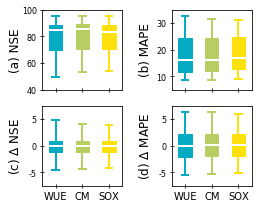

In [4]:
plots_calibration_gof.fig_boxes('3_fig')

**Fig. 3** Goodness-of-fit of the bootstrapping calibration approach using water use efficiency (WUE), carbon maximization (CM), and xylem vulnerability (SOX) stomatal optimization principles (Table 1) to estimate latent heat flux (LE): (a) Nash-Sutcliffe efficiency (NSE, %); (b) median percentage error (MAPE, %) of validation subsets; percentage differences between (c) NSE and (d) MAPE validation and calibration subsets. Boxes represent the interquartile range for the 30 study sites; whiskers represent 5th and 95th percentiles; and white lines represent medians.

WUE (o) R^2: 0.94   % bias: 6    
WUE (x) R^2: 0.92   % bias: 8    
CM (o) R^2: 0.94   % bias: 6    
CM (x) R^2: 0.90   % bias: 8    
SOX (o) R^2: 0.93   % bias: 14   
SOX (x) R^2: 0.87   % bias: 28   


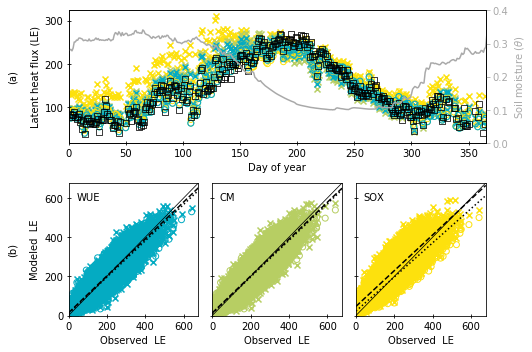

In [5]:
plots_calibration_gof.fig_site_ts('4_fig')

**Fig. 4** Goodness-of-fit between observed and modeled latent heat flux (LE, W m<sup>-2</sup>) at an example site (US-Blo, a seasonally dry evergreen needleleaf forest (Goldstein et al., 2000)), using water use efficiency (WUE, blue), carbon maximization (CM, green), and xylem vulnerability (SOX, yellow) stomatal optimization principles (Table 1). (a) Observed (black squares) and modeled LE, using site-specific (colored circles) and leave-one-site-out (colored crosses) calibrated parameters, averaged by day of year. Soil moisture (θ, cm<sup>3</sup> cm<sup>-3</sup>), averaged by day of year in grey to illustrate seasonal soil-water availability. (b) Scatter plots of half-hourly observed versus modeled LE. Black lines represent 1:1 (solid) and goodness-of-fit regressions using site-specific (dotted) and leave-one-site-out (dashed) calibrated parameters. The R2 (and bias) using leave-one-site-out parameters are 0.92 (0.08), 0.90 (0.08), and 0.87 (0.28) for WUE, CM, and SOX, respectively.


WUE	param	CV	H
	lww	0.05 	2.8  
	b	0.10 	2.4  

CM	param	CV	H
	b1	0.18 	3.7  
	b2	0.71 	2.3  
	a	0.56 	4.5  
	psi_50	0.59 	4.2  

SOX	param	CV	H
	kmax	0.68 	5.7  
	a	0.03 	1.5  
	psi_50	0.56 	5.2  


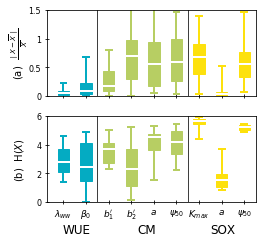

In [6]:
plots_param_uncertainty.fig_box('5_fig')

**Fig. 5** Parameter uncertainty resulting from the bootstrapping model calibration approach. (a) Distribution of parameter estimates (200 per site) normalized as the relative absolute difference from the site-specific mean value. (b) Distribution of parameter entropy (H(X), bits) at each site. Water use efficiency (WUE), carbon maximization (CM), and xylem vulnerability (SOX) stomatal optimization principles and respective model parameters are defined in Table 1. Boxes represent the interquartile range for the 30 study sites; whiskers represent 5th and 95th percentiles; and white lines represent medians.

Model	Param	N	B	G	C
WUE	lww	1.62 	1.14 	0.84 	0.74 
WUE	b	0.67 	0.22 	0.37 	1.95 
CM	b1	1.37 	0.97 	0.67 	0.34 
CM	b2	0.09 	0.09 	0.03 	1.70 
CM	a	3.85 	7.46 	3.39 	1.65 
CM	psi_50	1.71 	5.21 	2.39 	0.53 
SOX	kmax	1.59 	2.10 	2.32 	1.64 
SOX	a	1.75 	1.38 	1.22 	1.52 
SOX	psi_50	2.17 	3.22 	4.39 	3.57 


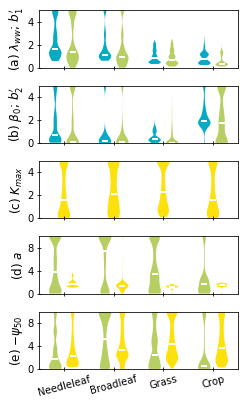

In [6]:
plots_param_uncertainty.fig_pftviolins('6_fig')

**Fig. 6** Distribution of model parameter estimates resulting from the boostrapping calibration approach for the 30 study sites (200 estimates per site) categorized according to needleleaf (n=8), broadleaf (n=8), grass (n=9), and crop (n=4) plant functional types, including: (a) λ<sub>ww</sub> (10<sup>-3</sup> mol mol<sup>−1</sup>), well-watered marginal water use efficiency; b<sub>1</sub>' (10<sup>-3</sup> mol mol<sup>−1</sup>), intercept of marginal xylem tension efficiency normalized by K<sub>max</sub>; (b) β<sub>0</sub> (MPa<sup>-1</sup>), slope of the log relation between marginal water use efficiency and water potential; b<sub>2</sub>' (10<sup>-3</sup> mol mol<sup>−1</sup> MPa<sup>-1</sup>), slope of marginal xylem tension efficiency normalized by 2K<sub>max</sub>; (c) K<sub>max</sub> (10<sup>-3</sup> mol m<sup>−2</sup> s<sup>−1</sup> MPa<sup>-1</sup>), maximum soil-to-canopy conductance; (d) a (unitless), shape parameter representing the sensitivity of xylem conductance to changes in water potential; (e) ψ<sub>50</sub> (MPa), water potential at 50 % conductivity loss. Water use efficiency (WUE, blue), carbon maximization (CM, green), and xylem vulnerability (SOX, yellow) stomatal optimization principles are defined in Table 1. The y axis limits of each subplot represent the parameters ranges considered in the calibration.

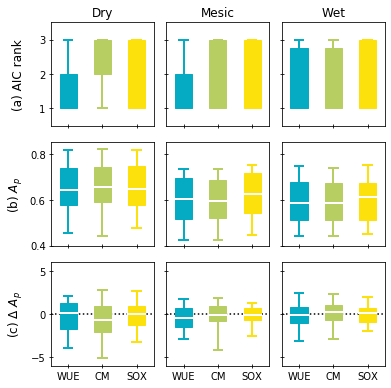

In [8]:
plots_it_performance.fig_prediction('7_fig')

**Fig. 7** Predictive model performance for dry, mesic, and wet conditions, using water use efficiency (WUE), carbon maximization (CM), and xylem vulnerability (SOX) stomatal optimization principles (Table 1) to estimate latent heat flux (LE). (a) The Akaike Information Criterion (AIC) rank between model variants characterizes model tradeoffs between prediction and number of calibrated model parameters. Within a site, the model with the lowest AIC is the most desirable (rank=1). (b) Predictive performance (A<sub>P</sub>, bits bit<sup>-1</sup>) quantifies the relative fraction of information missing in the model about LE compared to observed LE. (c) The relative difference in predictive performance (∆A<sub>P</sub>, %) using site-specific parameters versus out-of-sample parameters indicates low information loss from parameters generalized at the level of plant functional types. We define dry, mesic and wet as data points below, between and above the interquartile range of the observed soil moisture for each site. Boxes represent the interquartile range for the 30 study sites; whiskers represent 5th and 95th percentiles; and white lines represent medians.

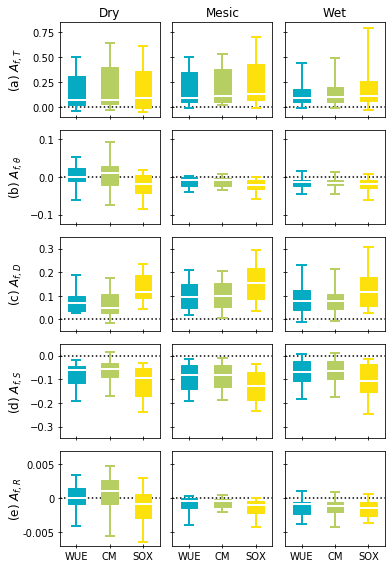

In [9]:
plots_it_performance.fig_function('8_fig')

**Fig. 8** Functional model performance for dry, mesic, and wet conditions using water use efficiency (WUE), carbon maximization (CM), and xylem vulnerability (SOX) stomatal optimization principles (Table 1) to estimate latent heat flux (LE). Functional performance is the relative difference between observed and modeled (a) total multi-variate mutual information from soil moisture (θ) and vapor pressure deficit (D) about LE (A<sub>f,T</sub>), bits bit<sup>-1</sup>) and its partitioning into (b) unique from soil moisture (A<sub>f,θ</sub>), bits bit<sup>-1</sup>), (c) unique from atmospheric demand (A<sub>f,D</sub>, bits bit<sup>-1</sup>), (d) synergistic (A<sub>f,S</sub>), bits bit<sup>-1</sup>), and (e) redundant (A<sub>f,R</sub>, bits bit<sup>-1</sup>) information. We define dry, mesic and wet as data points below, between and above the interquartile range of the observed soil moisture for each site. Boxes represent the interquartile range for the 30 study sites; whiskers represent 5<sup>th</sup> and 95<sup>th</sup> percentiles; and white lines represent medians.

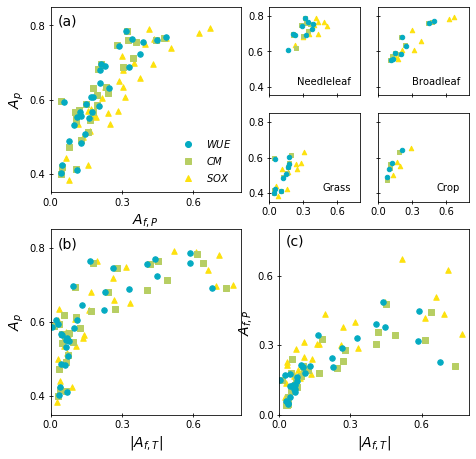

In [10]:
plots_it_performance.fig_scatter_A('9_fig')

**Fig. 9** Relations and tradeoffs between performance diagnostics based on information theory. (a) Predictive accuracy, measured by missing information about latent heat flux (LE) in model variants (A<sub>P</sub>, bits bit<sup>-1</sup>), versus functional accuracy, measured by the accuracy of multi-variate mutual information from soil moisture (θ) and vapor pressure deficit (D) about LE partitioned into unique, redundant and synergistic components (A<sub>f,P</sub> = |A<sub>f,θ</sub>| + |A<sub>f,D</sub>| + |A<sub>f,S</sub>| + |A<sub>f,R</sub>|, bits bit<sup>-1</sup>). (b) Predictive accuracy (A<sub>P</sub>, bits bit<sup>-1</sup>) versus functional accuracy, measured by the accuracy of total multi-variate mutual information from θ and D about LE (|A<sub>f,T</sub>|, bits bit<sup>-1</sup>). (c) Tradeoff between the two functional accuracies (A<sub>f,T</sub> versus A<sub>f,P</sub>).The absolute value of functional accuracy is taken because A<sub>f</sub> components can be positive or negative, where a value close to zero indicates the best match with observations. Markers each represent the performance of a study site and are colored according to water use efficiency (WUE, blue circle), carbon maximization (CM, green square), and xylem vulnerability (SOX, yellow triangle) stomatal optimization principles (Table 1). Small (a) subplots on the right separate study sites by plant functional type.

**Supplementary figure**

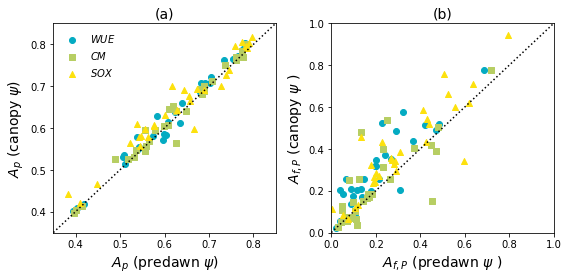

In [11]:
plots_supplementary_info.scatter_psi_variant('S1_fig')

**Fig. S1 Performance is higher for model variants using predawn versus canopy water potential (ψ) in the big-leaf comparison framework**. Comparison of (a) predictive (A<sub>p</sub>) and (b) functional (A<sub>f,P</sub>) model performance using predawn ψ (x axis) versus canopy ψ (y axis). We estimate predawn ψ as soil water ψ minus effects due to gravity, which are a function of canopy height. We infer canopy ψ from half-hourly data and independently of optimization principles: we first estimate transpiration from time series of latent heat observations and the fraction of soil evaporation to total evapotranspiration calibrated at each site (G<sub>soil</sub>/G<sub>surf</sub>); we then invert a simple hydraulic model (Manzoni et al., 2013) with literature values of hydraulic parameters by plant functional type (Table 2 in Eller et al., 2020). We use each time series of predawn or canopy ψ estimates as an input in our modeling framework to calculate surface conductance; to calibrate marginal water penalty function parameters; and to estimate latent heat fluxes (see Materials and Methods in the main text). Finally, we compare predictive and functional performance using predawn versus canopy ψ to calculate the marginal water penalty of photosynthesis in the modelling framework. We find that all model variants have better predictive and functional performance at the daily optimization time scale than at the subdaily time scale (lower A<sub>p</sub> and A<sub>f,P</sub>  using predawn versus canopy ψ). Nevertheless, ranking of model variants at the daily and subdaily timescales were consistent (WUE and CM perform better than SOX). The daily optimization time scale and use of predawn versus canopy ψ thus does not change our conclusions and provides higher performance in our modelling framework. Consequently, we decide to constrain our analysis to results at the daily optimization time scale using predawn ψ and avoid uncertainties in the estimation of canopy ψ in our modeling framework.

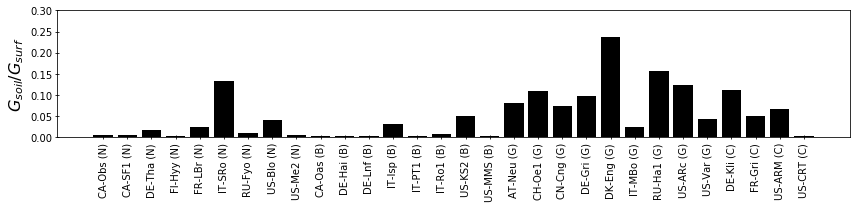

In [12]:
plots_supplementary_info.avg_ET_partitioning('S2_fig')

**Fig. Average soil-to-surface conductance ratios (G<sub>soil</sub>/G<sub>surf</sub>) of study sites**. This ratio indicates the partition of soil water evaporation to total evapotranspiration inferred from the modeling framework. We calculate G<sub>soil</sub> using a linear function of relative soil moisture, bound by a maximum value (G<sub>soil,sat</sub>) at soil saturation. We calibrate a model-average G<sub>soil,sat</sub> for each site (see Materials and Methods in the main text). Our approach ensures that soil water evaporation is equal in each model variant and that evapotranspiration partitioning is consistent with optimal stomatal behavior. In addition, our site and data selection criteria ensure that soil water evaporation is a smaller fraction of total evapotranspiration than transpiration from stomata and that dew or canopy-intercepted rainfall evaporation is negligible. Labels on the x axis indicate the study site FLUXNET ID and plant functional type in parenthesis (N, needleleaf tree; B, broadleaf tree; G, grass; C, crop).

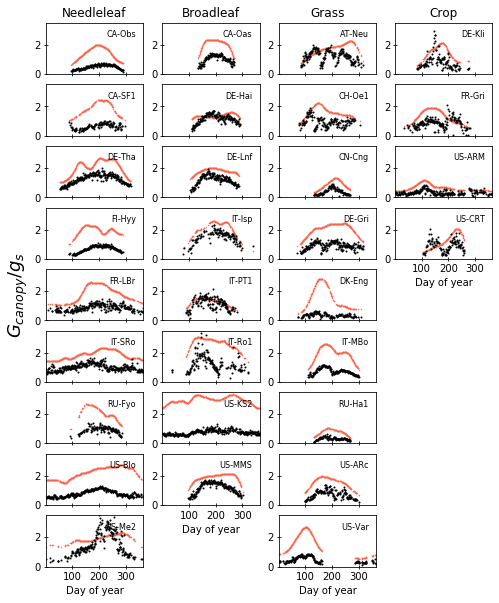

In [13]:
plots_supplementary_info.ts_scalling_avg('S3_fig')

**Fig. S3 Canopy-to-leaf conductance ratios (G<sub>canopy</sub>/g<sub>s</sub>) averaged by day of year at study sites**. This scaling factor is a proxy of effective leaf area index accounted for in the modelling framework (ratio of Eqn (3) to Eqn (2), see Materials and Methods in the main text). Scaling factor values (black symbols) are the average G<sub>canopy</sub>/g<sub>s</sub> using each of the selected stomatal optimization principles. For comparison, remotely-sensed leaf area index (red symbols) co-located with each site’s coordinates, from the Moderate Resolution Imaging Spectroradiometer (MODIS product MCD15A3H-006) with a spatial resolution of 500 m and temporal resolution of 4 days (Myneni, et al., 2015). We consider only cloudless MODIS data flagged as high-quality between 2003-13, then interpolate and average values by day of year, using a 30-day convolution to obtain a smooth annual pattern. The top right label for each subplot indicates the study site FLUXNET ID and subplots are organized in columns by plant function type. 

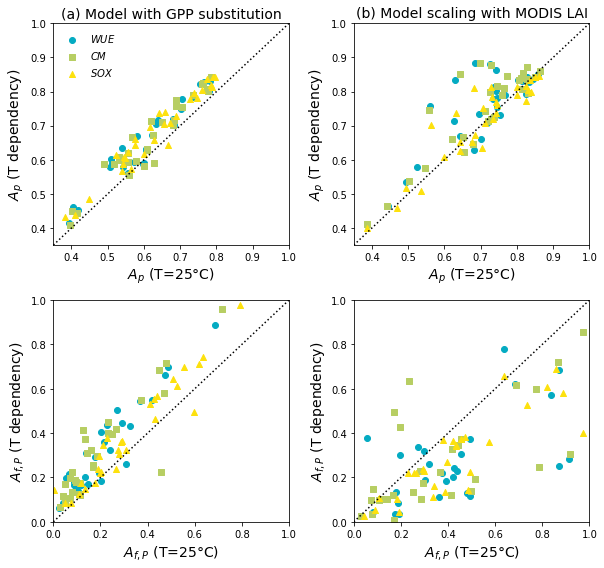

In [14]:
plots_supplementary_info.scatter_T_variant('S4_fig')

**Fig. S4 Performance is higher for model variants using photosynthesis parameters at 25°C versus with temperature dependency**. Comparison of predictive (A<sub>p</sub>, top) and functional (A<sub>f,P</sub>, bottom) performance of model variants using photosynthesis parameters at 25 °C (x axis) versus accounting for temperature dependency of photosynthesis parameters (y axis), see Methods S2. (a) Model variants calculating canopy conductance (Eqn (3)) with gross primary production (GPP) observations. (b) Model variants calculating stomatal conductance (Eqn (2)) and scaling from leaf to canopy using leaf area index (LAI) extracted from MODIS (see caption Fig. S3). Predictive and functional performance are better in the (a) modelling framework without temperature dependencies because they are sufficiently accounted for in the GPP data. Temperature dependencies benefit functional performance but not predictive performance of the alternative (b) modelling framework, in which LAI is the leaf-to-canopy scaling factor and in which optimal stomatal conductance is dependent on accurate estimation of photosynthesis. Nevertheless, the model rankings are similar with and without the inclusion of temperature dependencies in both alternative (a) and (b). Our method choice thus does not change our study conclusions (see Methods S2). Consequently, we use the best-performing modelling framework (a) and neglect temperature dependency of photosynthesis parameters in this study. 

Full record performance scores
		WUE	CM	SOX
delta_nse	0.52 	0.37 	0.62 
delta_mape	0.57 	0.38 	0.55 
param_entropy	0.82 	0.55 	0.13 
param_cv	0.48 	0.15 	0.87 
aic		0.63 	0.47 	0.40 
a_p		0.73 	0.62 	0.15 
d_a_p		0.62 	0.43 	0.45 
a_ft		0.85 	0.63 	0.02 
a_fp		0.73 	0.72 	0.05 
a_fu1		0.62 	0.70 	0.18 
a_fu2		0.72 	0.72 	0.07 
a_fs		0.62 	0.67 	0.22 
a_fr		0.58 	0.70 	0.22 

Dry quartile performance scores
		WUE	CM	SOX
aic		0.60 	0.40 	0.50 
a_p		0.73 	0.43 	0.33 
d_a_p		0.57 	0.28 	0.65 
a_ft		0.77 	0.52 	0.22 
a_fp		0.75 	0.73 	0.02 
a_fu1		0.73 	0.35 	0.42 
a_fu2		0.72 	0.77 	0.02 
a_fs		0.65 	0.75 	0.10 
a_fr		0.70 	0.35 	0.45 

Mesic interquartile performance scores
		WUE	CM	SOX
aic		0.58 	0.48 	0.43 
a_p		0.62 	0.78 	0.10 
d_a_p		0.43 	0.62 	0.45 
a_ft		0.78 	0.53 	0.18 
a_fp		0.68 	0.80 	0.02 
a_fu1		0.62 	0.65 	0.23 
a_fu2		0.68 	0.80 	0.02 
a_fs		0.65 	0.85 	0.00 
a_fr		0.62 	0.65 	0.23 

Wet quartile performance scores
		WUE	CM	SOX
aic		0.55 	0.53 	0.42 
a_p		0.48 	0.75 	0.27

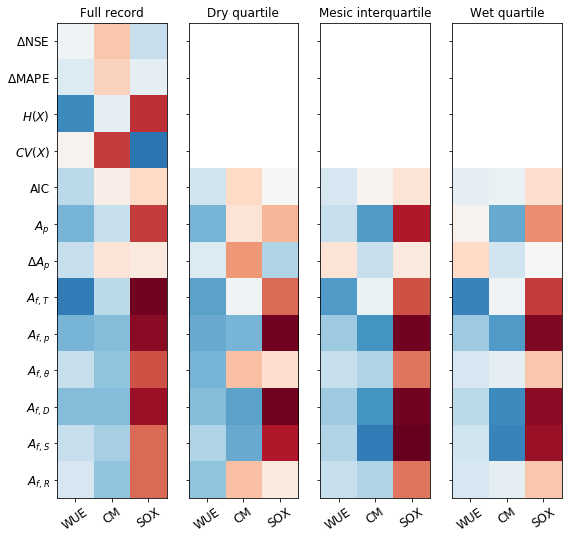

In [15]:
plots_rank_models.fig_SI_3M_a('S5_fig')

**Fig. S5 Model ranking and performance scores for detailed diagnostics and soil moisture conditions** of stomatal optimization model variants using water use efficiency (WUE), carbon maximization (CM), and xylem vulnerability (SOX) principles (Table 1) to estimate latent heat flux (LE): calibration/validation goodness-of-fit, measured by differences in Nash–Sutcliffe efficiency (ΔNSE) and median absolute percentage error (ΔMAPE); parameter uncertainty, measured by the entropy (H(X)) and the coefficient of variation (CV(X)) of calibrated parameter values; adequate parsimony, measured by the Akaike Information Criterion (AIC); predictive accuracy, measured by missing information about LE in the model (A<sub>p</sub>,); functional accuracy, measured by the accuracy of multi-variate mutual information from soil moisture (θ) and vapor pressure deficit (D) about LE (A<sub>f,T</sub>) and its partitioning (A<sub>f,P</sub>) into unique from soil moisture(A<sub>f,θ</sub>), unique from atmospheric demand (A<sub>f,D</sub>), synergistic (A<sub>f,S</sub>), and redundant (A<sub>f,R</sub>) components; generalization, measured by information loss about LE (ΔA<sub>p</sub>) using site-specific versus leave-one-site-out parameters. We rank model variants within each site and average the 30 site-specific scores for each diagnostic and model variant. We provide scores of individual diagnostics calculated for the full record, wet, mesic, and dry conditions.  We define dry, mesic and wet as data points below, between and above the interquartile range of the observed soil moisture for each site.

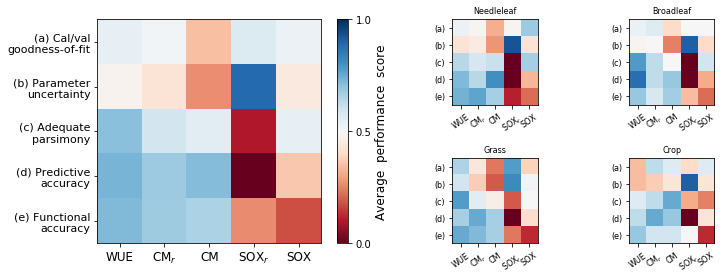

In [16]:
plots_rank_models.fig_SI_5M_s('S6_fig')

**Fig. S6 Performance scores for five stomatal optimization model variants**. Same criteria and explanations as Fig. 2 including CMr and SOXr model variants using literature instead of calibrated values for: ψ<sub>50</sub> (MPa), water potential at 50 % conductivity loss and a (unitless), shape parameter representing the sensitivity of xylem conductance to changes in water potential. Literature parameters values for ψ<sub>50</sub> and a are taken from Table 2 in Eller et al. (2020), in which species-level data are compiled from the literature for each plant functional type, except a values for crop and grass plant functional types, which are calibrated to FLUXNET data using SOX.  